<a href="https://colab.research.google.com/github/Yoomin99/LIGN167_Stock/blob/main/LIGN167_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIGN 167 Stock prediction Final projects
 
- Yoomin Oh
- Sudit

Data sources
- https://www.kaggle.com/datasets/kannan1314/amazon-stock-price-all-time
- https://www.kaggle.com/datasets/varpit94/google-stock-data
- https://www.kaggle.com/datasets/akpmpr/updated-netflix-stock-price-all-time

Code sources  
- https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import time

Data Frame

In [ ]:
Amazon = pd.read_csv("/Amazon.csv")
Amazon['Date'] = pd.to_datetime(Amazon['Date'])
Amazon_2010_2015 = Amazon[~(Amazon['Date'] > '2015-12-31')]
Amazon_2010_2015 = Amazon_2010_2015[~(Amazon_2010_2015['Date'] < '2010-1-1')].reset_index(drop = True)
Amazon_2010_2015

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
1,2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2,2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
3,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
4,2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...,...
1505,2015-12-24,663.349976,664.679993,660.599976,662.789978,662.789978,1091200
1506,2015-12-28,665.559998,675.500000,665.500000,675.200012,675.200012,3783600
1507,2015-12-29,677.979980,696.440002,677.890015,693.969971,693.969971,5735000
1508,2015-12-30,691.890015,695.489990,686.380005,689.070007,689.070007,3519000


In [ ]:
Google = pd.read_csv("/GOOGL.csv")
Google['Date'] = pd.to_datetime(Google['Date'])
Google_2010_2015 = Google[~(Google['Date'] > '2015-12-31')]
Google_2010_2015 = Google_2010_2015[~(Google_2010_2015['Date'] < '2010-1-1')].reset_index(drop = True)
Google_2010_2015

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,313.788788,315.070068,312.432434,313.688690,313.688690,3908488
1,2010-01-05,313.903900,314.234222,311.081085,312.307312,312.307312,6003391
2,2010-01-06,313.243256,313.243256,303.483490,304.434448,304.434448,7949443
3,2010-01-07,305.005005,305.305298,296.621613,297.347351,297.347351,12815771
4,2010-01-08,296.296295,301.926941,294.849854,301.311310,301.311310,9439151
...,...,...,...,...,...,...,...
1505,2015-12-24,768.520020,769.200012,764.390015,765.840027,765.840027,520600
1506,2015-12-28,770.000000,782.820007,767.729980,782.239990,782.239990,1557800
1507,2015-12-29,786.989990,798.690002,786.200012,793.960022,793.960022,1921500
1508,2015-12-30,793.960022,796.460022,787.200012,790.299988,790.299988,1428300


In [ ]:
Netflix = pd.read_csv("/netflix.csv")
Netflix['Date'] = pd.to_datetime(Netflix['Date'])
Netflix_2010_2015 = Netflix[~(Netflix['Date'] > '2015-12-31')]
Netflix_2010_2015 = Netflix_2010_2015[~(Netflix_2010_2015['Date'] < '2010-1-1')].reset_index(drop = True)
Netflix_2010_2015

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.961429,7.565714,7.931429,7.640000,17239600.0,7.640000
1,2010-01-05,7.657143,7.258571,7.652857,7.358571,23753100.0,7.358571
2,2010-01-06,7.672857,7.197143,7.361429,7.617143,23290400.0,7.617143
3,2010-01-07,7.757143,7.462857,7.731429,7.485714,9955400.0,7.485714
4,2010-01-08,7.742857,7.465714,7.498571,7.614286,8180900.0,7.614286
...,...,...,...,...,...,...,...
1505,2015-12-24,118.800003,117.300003,118.220001,117.330002,3531300.0,117.330002
1506,2015-12-28,117.349998,113.849998,117.260002,117.110001,8424300.0,117.110001
1507,2015-12-29,119.599998,116.919998,118.190002,119.120003,8159200.0,119.120003
1508,2015-12-30,119.019997,116.430000,118.949997,116.709999,8149700.0,116.709999


Regession line

In [ ]:
def regressionLine(y):
    days = np.size(y)
    x = []
    for i in range(1,days+1):
        x.append(i)
    x = np.array(x)

    avgX = np.average(x)
    avgY = np.average(y)
    SumX = np.sum(x)
    SumY = np.sum(y)

    xy = 0
    xx = 0
    for i in range(len(x)):
        xy = xy + (x[i]- avgX) * (y[i] - avgY)
        xx = xx + (x[i]- avgX)**2
    
    slope = xy/xx
    b = avgY - slope*avgX
    return (b, slope)




In [ ]:
def plotRegressionLine(df , company, b):
    # plotting the actual points as scatter plot
    y = df["Close"]
    date = df["Date"]
    
    x = []
    for i in range(1, np.size(y) + 1):
        x.append(i)
    x = np.array(x)
    plt.plot(date, y, color = "m")
  
    # predicted stock price
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(date, y_pred, color = "b")
  
    # putting labels
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(company  + " stock price from 2010 to 2015")
    # function to show plot
    plt.show()

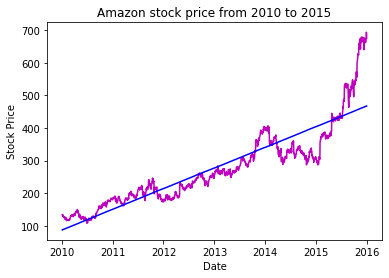

In [ ]:
Amazonb = (regressionLine(Amazon_2010_2015["Close"]))
plotRegressionLine(Amazon_2010_2015,"Amazon", Amazonb)

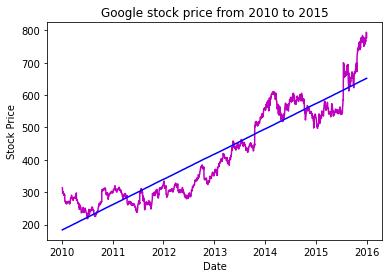

In [ ]:
Googleb = (regressionLine(Google_2010_2015["Close"]))
plotRegressionLine(Google_2010_2015,"Google", Googleb)

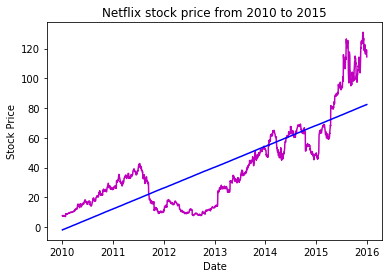

In [ ]:
Netflixb = (regressionLine(Netflix_2010_2015["Close"]))
plotRegressionLine(Netflix_2010_2015,"Netflix", Netflixb)

In [ ]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel , self).__init__()
        self.linear = torch.nn.Linear(1,1)
    def forward(self , x):
        return self.linear(x)


In [ ]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    print(data_raw)
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback):
        data.append(data_raw[index: index + lookback])
        
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [ ]:

price = Netflix_2010_2015["Close"]
data_raw = price.to_numpy() # convert to numpy array
data = []

# create all possible sequences of length seq_len
for index in range(len(data_raw) - 20):
    data.append(data_raw[index: index + 20])
  



  
    


  # y_trained_pred = regressionLine(y_train)
  # PredictionY = scaler.inverse_transform(y_trained_pred.detach().numpy())
  # ActualY = scaler.inverse_transform(y_test)
  # aa=[x for x in range(len(y_trained_pred))]

  # plt.plot(aa, ActualY, marker='.', label="actual")
  # plt.plot(aa, PredictionY, 'r', label="prediction")
  # plt.tight_layout()
  # plt.subplots_adjust(left=0.07)
  # plt.ylabel('Stock Price', size=15)
  # plt.xlabel('Number of day testing', size=15)
  # plt.title(company + " stock")
  # plt.legend(fontsize=15)
  # plt.show();



In [ ]:

print( Netflix_2010_2015["Close"].to_numpy()[:302,-1,:])

IndexError: ignored

In [ ]:
x = []
for i in range(1, np.size(Google_2010_2015["Close"]) + 1):
    x.append(float(i))
   
x = np.array(x)
y = Google_2010_2015["Close"]

x_torch = torch.FloatTensor(x).reshape(-1,1)
y_torch = torch.FloatTensor(y).reshape(-1,1)

w = torch.tensor(Googleb[1],requires_grad = True)
b = torch.tensor(Googleb[0],requires_grad = True)
lr = 0.01

for i in range(1):
    y_hat = x_torch*w + b
    loss = torch.sum(torch.pow(y_torch - y_hat , 2) / len(y_torch))
    loss.backward()
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        w.grad.zero_()
        b.grad.zero_()

y_pred = x_torch*w + b

plt.plot(x_torch, y_torch , 'g')
plt.plot(x_torch, y_pred.detach().numpy(),'b')


logistic regression linear
# 

LSTM
# Pytorch

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [ ]:
def trainLSTM(data , company):
  scaler = MinMaxScaler(feature_range=(-1, 1))
  price = data[['Close']]
  price['Close'] = scaler.fit_transform(data["Close"].values.reshape(-1,1))
  input_dim = 1
  hidden_dim = 50
  num_layers = 2
  output_dim = 1
  num_epochs = 100
  lookback = 20


  x_train, y_train, x_test, y_test = split_data(price, lookback)
  x_train = torch.from_numpy(x_train).type(torch.Tensor)
  x_test = torch.from_numpy(x_test).type(torch.Tensor)
  y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
  y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

  model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
  criterion = torch.nn.MSELoss(reduction='mean')
  optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

  hist = np.zeros(num_epochs)
  start_time = time.time()
  lstm = []
  for t in range(num_epochs):
      y_train_pred = model(x_train)
      loss = criterion(y_train_pred, y_train_lstm)
      hist[t] = loss.item()
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

 
  y_trained_pred = model(x_test)
  PredictionY = scaler.inverse_transform(y_trained_pred.detach().numpy())
  ActualY = scaler.inverse_transform(y_test)
  xAsix=[x for x in range(len(y_trained_pred))]
  plt.plot(xAsix, ActualY, marker='.', label="actual")
  plt.plot(xAsix, PredictionY, 'r', label="prediction")
  plt.ylabel('Stock Price', size=15)
  plt.xlabel('Number of day testing', size=15)
  plt.title(company + " stock")
  plt.show();


In [ ]:
trainLSTM(Netflix_2010_2015 , "Netflix")

In [ ]:
trainLSTM(Google_2010_2015 , "Google")

In [ ]:
trainLSTM(Amazon_2010_2015 , "Amazon")

GRU
# pytorch

In [ ]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [ ]:
def trainGRU(data , company):
  scaler = MinMaxScaler(feature_range=(-1, 1))
  price = data[['Close']]
  price['Close'] = scaler.fit_transform(data["Close"].values.reshape(-1,1))
  input_dim = 1
  hidden_dim = 50
  num_layers = 2
  output_dim = 1
  num_epochs = 100
  lookback = 20


  x_train, y_train, x_test, y_test = split_data(price, lookback)
  x_train = torch.from_numpy(x_train).type(torch.Tensor)
  x_test = torch.from_numpy(x_test).type(torch.Tensor)
  y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
  y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)

  model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
  criterion = torch.nn.MSELoss(reduction='mean')
  optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

  hist = np.zeros(num_epochs)
  lstm = []
  for t in range(num_epochs):
      y_train_pred = model(x_train)
      loss = criterion(y_train_pred, y_train_lstm)
      hist[t] = loss.item()
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()
  
  y_trained_pred = model(x_test)
  PredictionY = scaler.inverse_transform(y_trained_pred.detach().numpy())
  ActualY = scaler.inverse_transform(y_test)
  aa=[x for x in range(len(y_trained_pred))]
  plt.plot(aa, ActualY, marker='.', label="actual")
  plt.plot(aa, PredictionY, 'r', label="prediction")
  plt.tight_layout()
  plt.subplots_adjust(left=0.07)
  plt.ylabel('Stock Price', size=15)
  plt.xlabel('Number of day testing', size=15)
  plt.title(company + " stock")
  plt.legend(fontsize=15)
  plt.show();

In [ ]:
trainGRU(Google_2010_2015 , "Google")

In [ ]:
trainGRU(Netflix_2010_2015 , "Netflix")

In [ ]:
trainGRU(Amazon_2010_2015 , "Amazon")